In [1]:
import numpy as np
import matplotlib.pylab as plt
import pymc3 as pm
import seaborn as sns

from warnings import filterwarnings

filterwarnings('ignore')

sns.set_style('whitegrid')

print('Running on PyMC3 v{}'.format(pm.__version__))

%matplotlib inline

Running on PyMC3 v3.6


In [5]:
totals = np.array([10123, 11098, 9879, 10200, 9898, 9987])
amounts = np.array([800, 900, 1100, 1019, 879, 860])

In [6]:
p_obs = amounts/totals

In [7]:
np.allclose(totals * p_obs, amounts)

True

In [8]:
with pm.Model() as model:

    a = pm.HalfNormal('a', .5) #0.5)
    b = pm.HalfNormal('b', .5) #0.1)
    
    p = pm.Beta("p", alpha=a, beta=b)
    
    l = totals * p
    
    s = pm.Poisson("spend", 
                       mu=l, 
                       observed=amounts
                  )

In [9]:
with model:
    trace = pm.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, b, a]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:04<00:00, 2374.22draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.


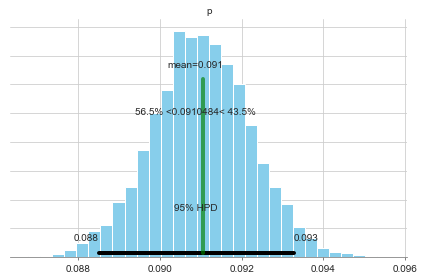

In [10]:
pm.plot_posterior(trace, varnames=["p"], ref_val=p_obs.mean())

In [11]:
with pm.Model() as model2:

    a = pm.HalfNormal('a', .5) #0.5)
    b = pm.HalfNormal('b', .5) #0.1)
    
    p = pm.Beta("p", alpha=a, beta=b, shape=len(p_obs))
    
    l = totals * p
    
    s = pm.Poisson("spend", 
                       mu=l, 
                       observed=amounts
                  )

In [12]:
with model2:
    trace2 = pm.sample(draws=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p, b, a]
Sampling 4 chains: 100%|██████████| 10000/10000 [00:04<00:00, 2326.25draws/s]


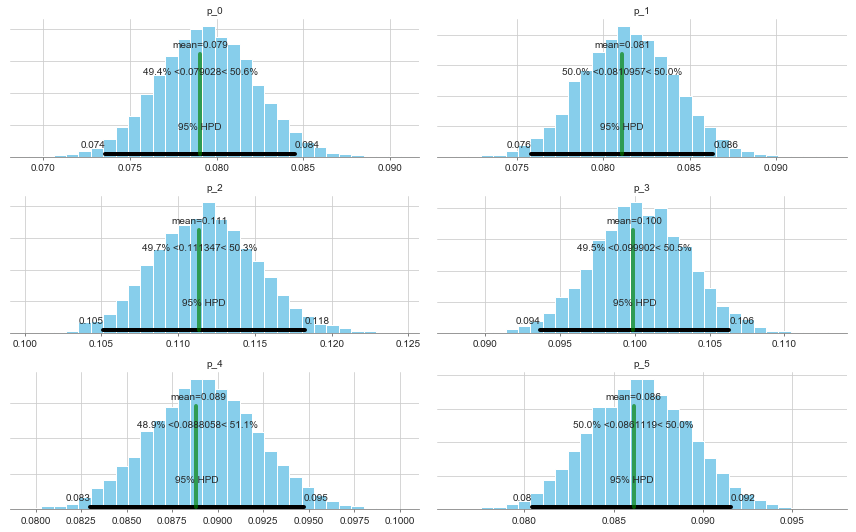

In [14]:
pm.plot_posterior(trace2, varnames=["p"], ref_val=p_obs);